In [ ]:
#Implement PCA and find principal component using a given dataset

In [ ]:
# Demo based data as Array taken

In [ ]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
C = A - M
print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
[3. 4.]
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]
[[4. 4.]
 [4. 4.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


In [ ]:
# Inbuilt dataset taken as input

In [ ]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
#import the breast _cancer dataset
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
data.keys()

# Check the output classes
print(data['target_names'])

# Check the input attributes
print(data['feature_names'])


['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# construct a dataframe using pandas
df1=pd.DataFrame(data['data'],columns=data['feature_names'])

# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(df1)
Scaled_data=scaling.transform(df1)

# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

# Check the dimensions of data after PCA
print(x.shape)


(569, 3)


In [ ]:
# Check the values of eigen vectors
# prodeced by principal components
principal.components_


array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611303,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853119,  0.06454985, -0.00931418,  0.02869955, -0.10429151,
        -0.0740916 ,  0.00273371, -0.02556378, -0

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,2],c=data['target'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

NameError: name 'plt' is not defined

Text(0.5, 0, 'PC3')

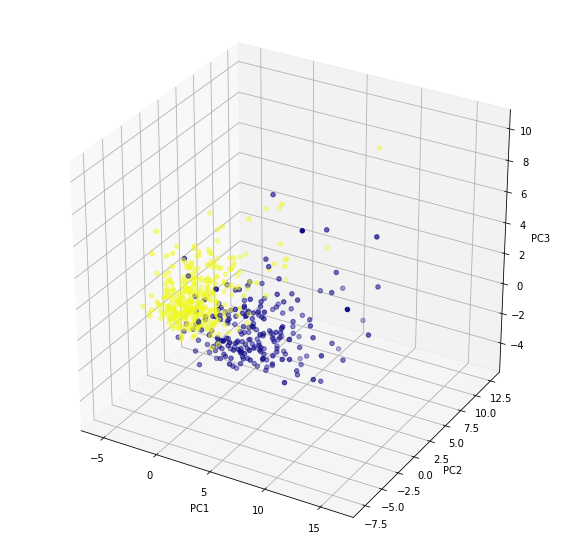

In [ ]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=data['target'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)


In [ ]:
# How dimension Reduction Works?

In [ ]:
def pca_np(x):
#centering data
  m = np.mean(x, axis =0)
  x_centered = x - m
#calculating covariance matrix
  x_cov=np.cov(x_centered.T)
#eigendecomposition
  eigenvals, eigenvecs = np.linalg.eig(x_cov)
#sorting
  i= np.argsort(eigenvals)[::-1]
  eigenvecs = eigenvecs[:,i]
  eigenvals= eigenvals[i]
#returning the eigenvalues, eigenvectors and means
  return(eigenvals, eigenvecs, m)

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
iris_evals, iris_evecs, iris_mean = pca_np(data)
print("eigenvalues:", iris_evals)
print("eigenvectors:", iris_evecs)

eigenvalues: [4.22824171 0.24267075 0.0782095  0.02383509]
eigenvectors: [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()
import numpy as np
#number of components to keep
n = 2
#importing the data
X = iris.data
y = iris.target
#train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
#applying our PCA function
X_evals, X_evecs, X_mean = pca_np(X_train)
#retaining the eigenvectors for first 2 PCs
X_evecs_n = X_evecs[:,:n]
#projecting the training and test data back onto the retained #eigenvectors to get our factors for use in predictive algorithms
X_factors_train = np.dot(X_train-X_mean,X_evecs_n)
X_factors_test= np.dot(X_test-X_mean,X_evecs_n)
#checking the dimensions before and after PCA
print("Training Set Dimensions:", X_train.shape)
print("Test Set Dimensions:", X_test.shape)
print("Training Set Dimensions after PCA:", X_factors_train.shape)
print("Test Set Dimensions after PCA:", X_factors_test.shape)

Training Set Dimensions: (120, 4)
Test Set Dimensions: (30, 4)
Training Set Dimensions after PCA: (120, 2)
Test Set Dimensions after PCA: (30, 2)


In [ ]:
# On external dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('wine.data.csv')
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [ ]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [ ]:
dfx.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [ ]:
dfx.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)

In [ ]:
dfx_pca = pca.fit(dfx)

In [ ]:
dfx_trans = pca.transform(dfx)

In [ ]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893,-0.152146,-0.101996,0.405585,-0.379433,0.145155
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934,-0.457016,1.016563,-0.442433,0.141230,-0.271778
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979,0.123370,0.735600,0.293555,0.379663,-0.110164
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578,0.606589,0.174107,-0.508933,-0.635249,0.142084
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580,0.230489,0.179420,0.012478,0.550327,-0.042455


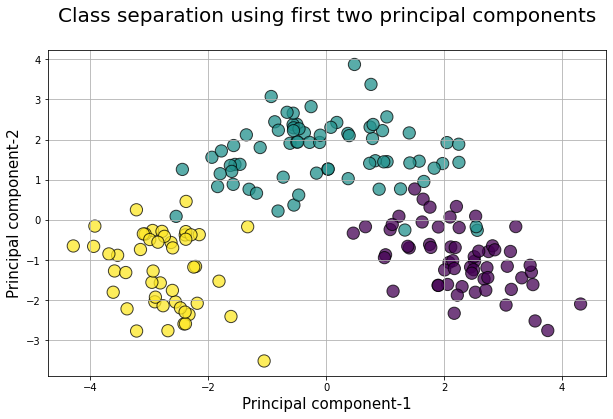

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

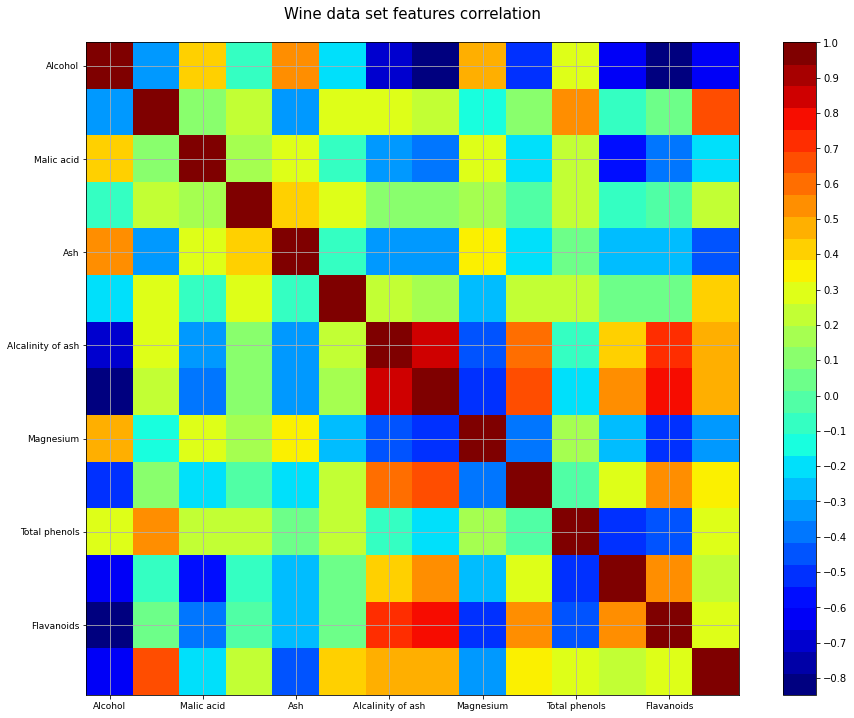

In [ ]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

In [ ]:
from sklearn import datasets

In [ ]:
	
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_cir

In [ ]:
[data for data in dir(datasets) if data.startswith("load")]

['load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine']